# Decision Trees
---

- A decision tree is a type of supervised machine learning algorithm that is used for both classification and regression tasks. It's essentially a model of decisions and all of their possible consequences, including outcomes, resource costs, and utility. Decision trees are particularly popular due to their ease of interpretation and understanding, which makes them suitable for business decisions, medical decision-making, and any other domain where transparency is crucial.

## Structure of a Decision Tree

1. Root Node: This is where the decision tree starts. It represents the entire dataset, which then gets split into two or more homogeneous sets.

2. Splitting: This is the process of dividing a node into two or more sub-nodes according to certain criteria. Common algorithms for choosing a split include Gini Impurity, Entropy (Information Gain), and Variance Reduction.

3. Decision Node: When a sub-node splits into further sub-nodes, it becomes a decision node.

4. Leaf/Terminal Node: Nodes that do not split further are called leaves or terminal nodes. They represent the decision outcomes or final categories in classification tasks, or continuous values in regression.

5. Branch or Sub-Tree: A subsection of the entire tree is called a branch or sub-tree.

6. Parent and Child Nodes: These are relative terms in trees, referring to the nodes connected directly above (parent) or below (child).

## How a Decision Tree Works

1. Selecting the Best Attribute: Using an Attribute Selection Measure (ASM), the best attribute is selected at each node. The attribute with the highest ASM score is chosen to make the decision at that node. Commonly used measures include:

- Gini Impurity (used in CART—Classification and Regression Trees): A measure of how often a randomly chosen element would be incorrectly classified.

- Entropy/Information Gain (used in ID3, C4.5): Entropy measures the disorder or uncertainty, and information gain is the measure of the difference in entropy before and after the split.
Variance Reduction: Typically used in regression trees to choose splits that reduce variance in the target variable across the groups formed by the split.

## Building the Tree

- Start at the root node and split the data on the feature that results in the highest ASM score. Repeat this process recursively for each child node and stop when one of the following conditions is met:
        - All tuples at a node belong to the same attribute value.
        - There are no more remaining attributes to split on.
        - There are no more instances.

## Pruning

- This step involves removing sub-nodes of a decision node that may be using noisy data to prevent model overfitting. Pruning can enhance the model's ability to generalize to unseen data. There are different algorithms for pruning, such as reduced error pruning and cost complexity pruning.

## Making Predictions

- Once the tree is built (and optionally pruned), it can be used to make predictions. The input features of an instance are compared against the tree's features, following the path dictated by those comparisons, down to a leaf node which provides the prediction.
Advantages of Decision Trees


## Interpretability

- One of the most significant advantages of decision trees is that their decisions are easy to understand. The tree structure mimics human-level thinking and logic, making it simple to visualize and interpret.

## No Need for Data Normalization

- Decision trees do not require normalization of data. They can handle both numerical and categorical data and are relatively unaffected by outliers.
  
## Feature Importance

- A natural by-product of the decision tree algorithm is the ranking of features by importance, which can provide insights into the dataset.

### Disadvantages of Decision Trees

- Overfitting: Without pruning, decision trees may create overly complex trees that do not generalize well from the training data.

- Instability: Small changes in the data might result in a completely different tree being generated. This is remedied by using decision tree ensembles, such as Random Forests or Gradient Boosted Trees.

- Biased Trees: Decision trees can be biased toward attributes with more levels. Techniques like balancing the dataset and setting the maximum depth of the tree can help prevent this bias.

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=1000, n_features=6, n_informative=6, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, flip_y=0.01, class_sep=2)

df = pd.DataFrame(X, columns = ["A","B","C","D","E","F"])
df["Y"] = y
df

,A,B,C,D,E,F,Y
0,-0.386445,-2.239737,0.362621,-3.453760,-1.124493,0.313112,0
1,-0.633809,4.337207,2.489168,-1.387778,1.837356,3.099364,1
2,-2.319766,-0.784643,-1.712846,2.723821,-0.996796,-2.481470,2
3,-2.347107,-2.701016,-1.563410,0.475186,-1.295235,-3.368295,2
4,-1.132311,-2.047961,1.991721,-2.574052,-2.919217,0.265799,0
...,...,...,...,...,...,...,...
995,-3.651971,1.732387,3.067757,-1.746212,3.149782,0.915868,1
996,0.672790,-2.755347,2.100378,-2.256427,-1.634887,1.631745,0
997,-1.331397,-1.665449,1.368269,-2.111665,-3.133110,1.835576,0
998,-4.627161,-0.228341,2.031245,-3.198346,1.259705,0.513734,1


## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
 4   E       1000 non-null   float64
 5   F       1000 non-null   float64
 6   Y       1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [9]:
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
Y    0
dtype: int64

In [119]:
df = df.dropna()

## Visualization

<Axes: xlabel='A', ylabel='B'>

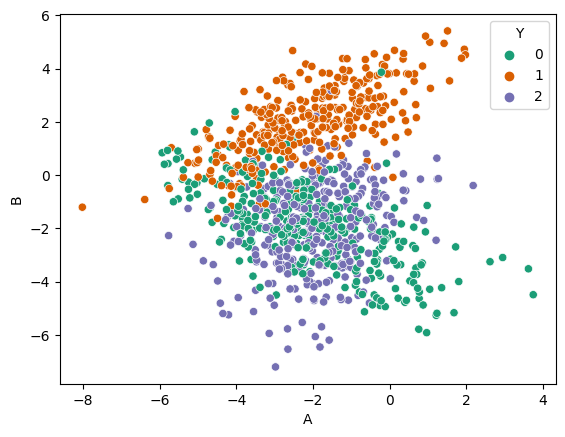

In [11]:
sns.scatterplot(x='A',y='B',data=df,hue='Y',palette='Dark2')

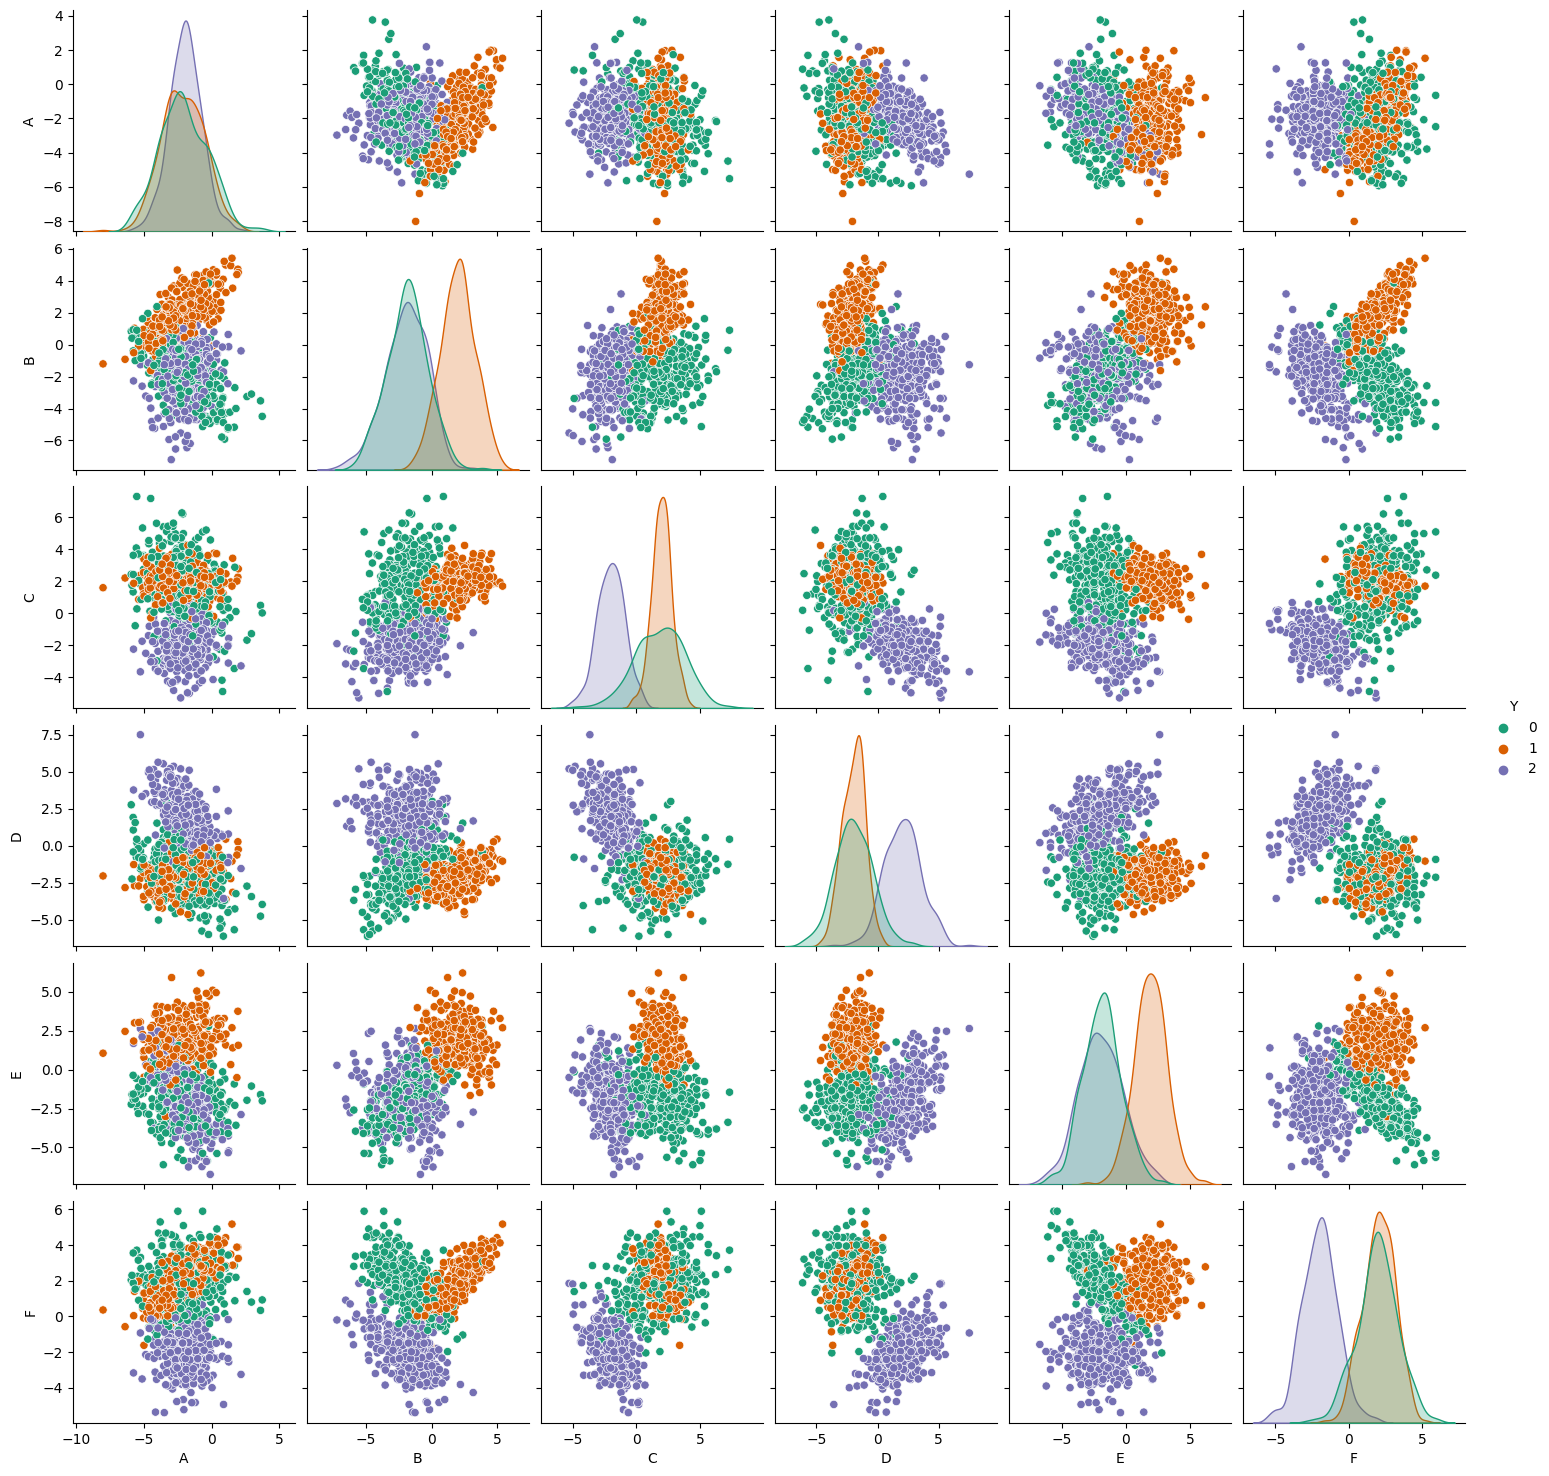

In [12]:
sns.pairplot(df,hue='Y',palette='Dark2')

## Train | Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
base_pred = model.predict(X_test)

## Evaluation

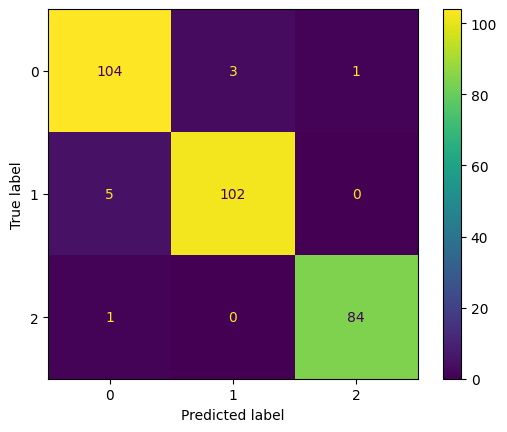

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# Assuming 'model' is your trained classifier and X_test, y_test are your test datasets.
# First, you need to predict the test set outcomes.
y_pred = model.predict(X_test)

# Now, compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Then, create the display object for the confusion matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Finally, use the display object to plot the matrix.
cmd.plot()
plt.show()  # This line is to make sure the plot is displayed in some environments.

In [32]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.97      0.95      0.96       107
           2       0.99      0.99      0.99        85

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [33]:
model.feature_importances_

array([0.02411234, 0.35344661, 0.04910501, 0.05016866, 0.07728848,
       0.4458789 ])

In [37]:
pd.DataFrame(index=df.drop('Y', axis=1).columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
A,0.024112
B,0.353447
C,0.049105
D,0.050169
E,0.077288
F,0.445879


## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [38]:
from sklearn.tree import plot_tree

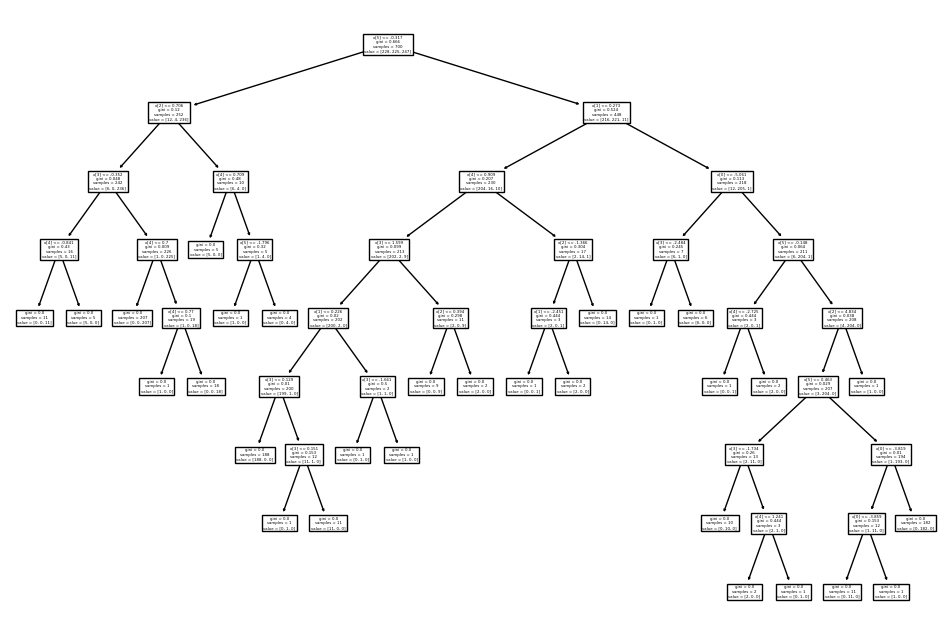

In [39]:
plt.figure(figsize=(12,8))
plot_tree(model);

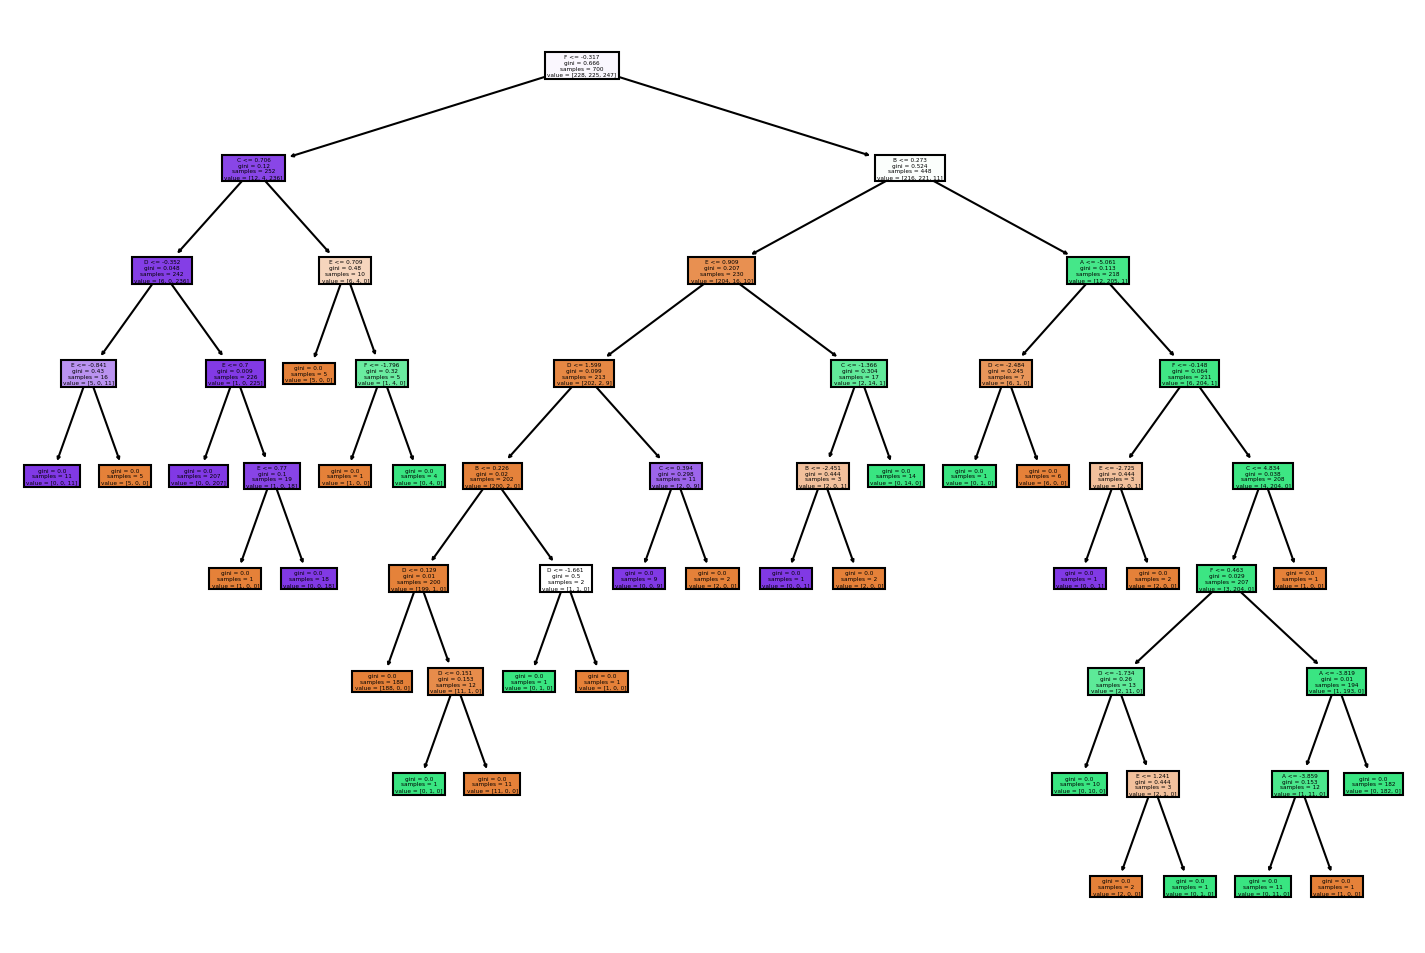

In [42]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=df.drop('Y', axis=1).columns,);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [47]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=df.drop('Y', axis=1).columns,);

## Understanding Hyperparameters

### Max Depth

In [48]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [49]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       108
           1       0.94      0.86      0.90       107
           2       0.97      0.82      0.89        85

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.89      0.87      0.88       300





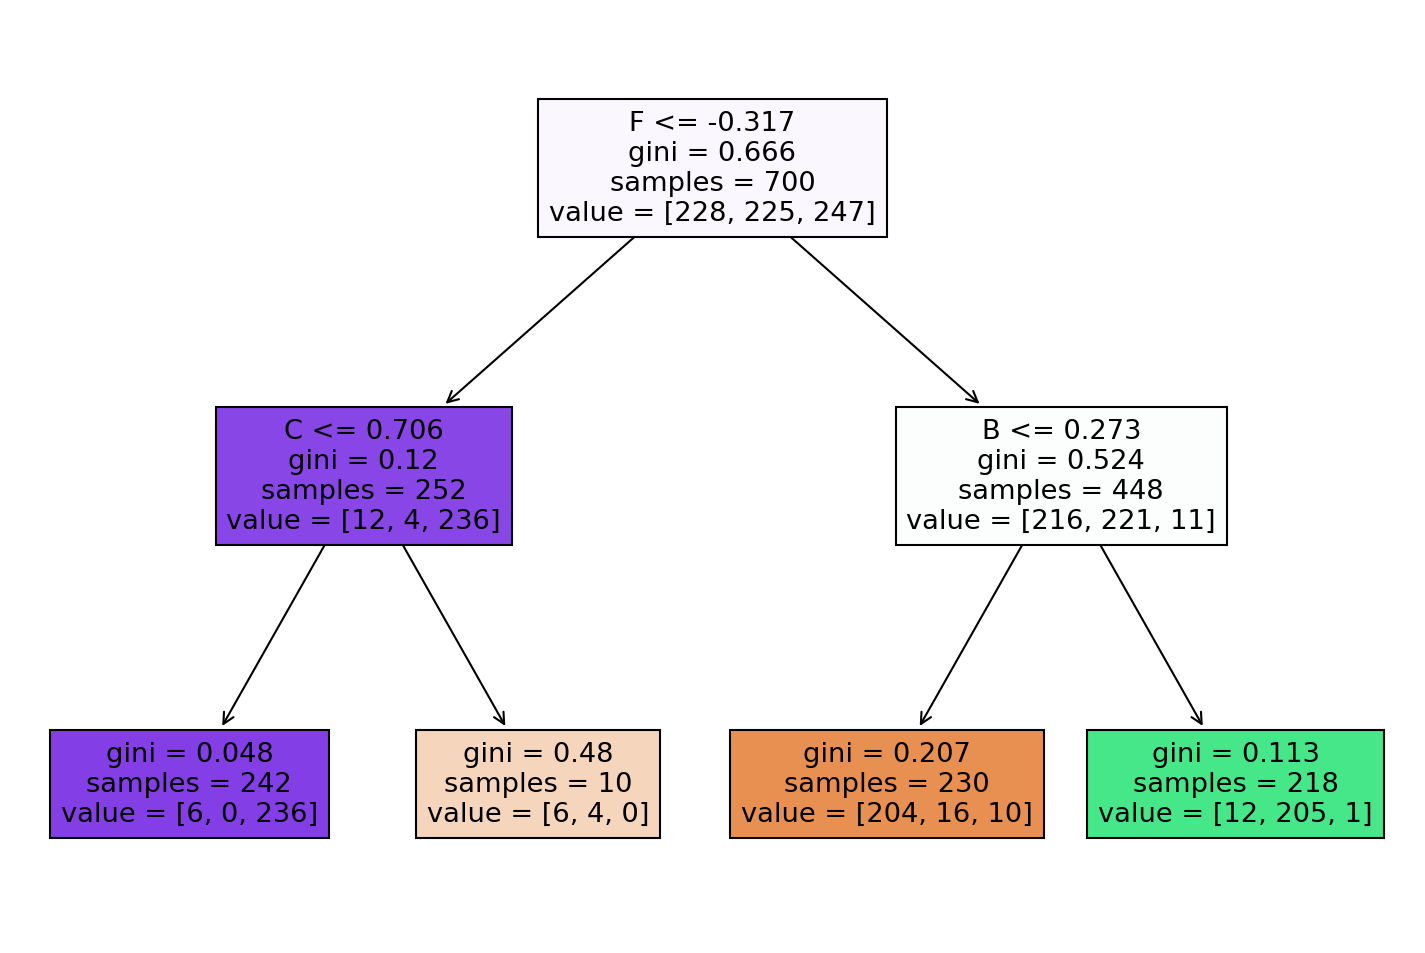

In [50]:
report_model(pruned_tree)

## Max Leaf Nodes

In [51]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       108
           1       0.94      0.86      0.90       107
           2       0.90      0.82      0.86        85

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.86       300
weighted avg       0.86      0.85      0.86       300





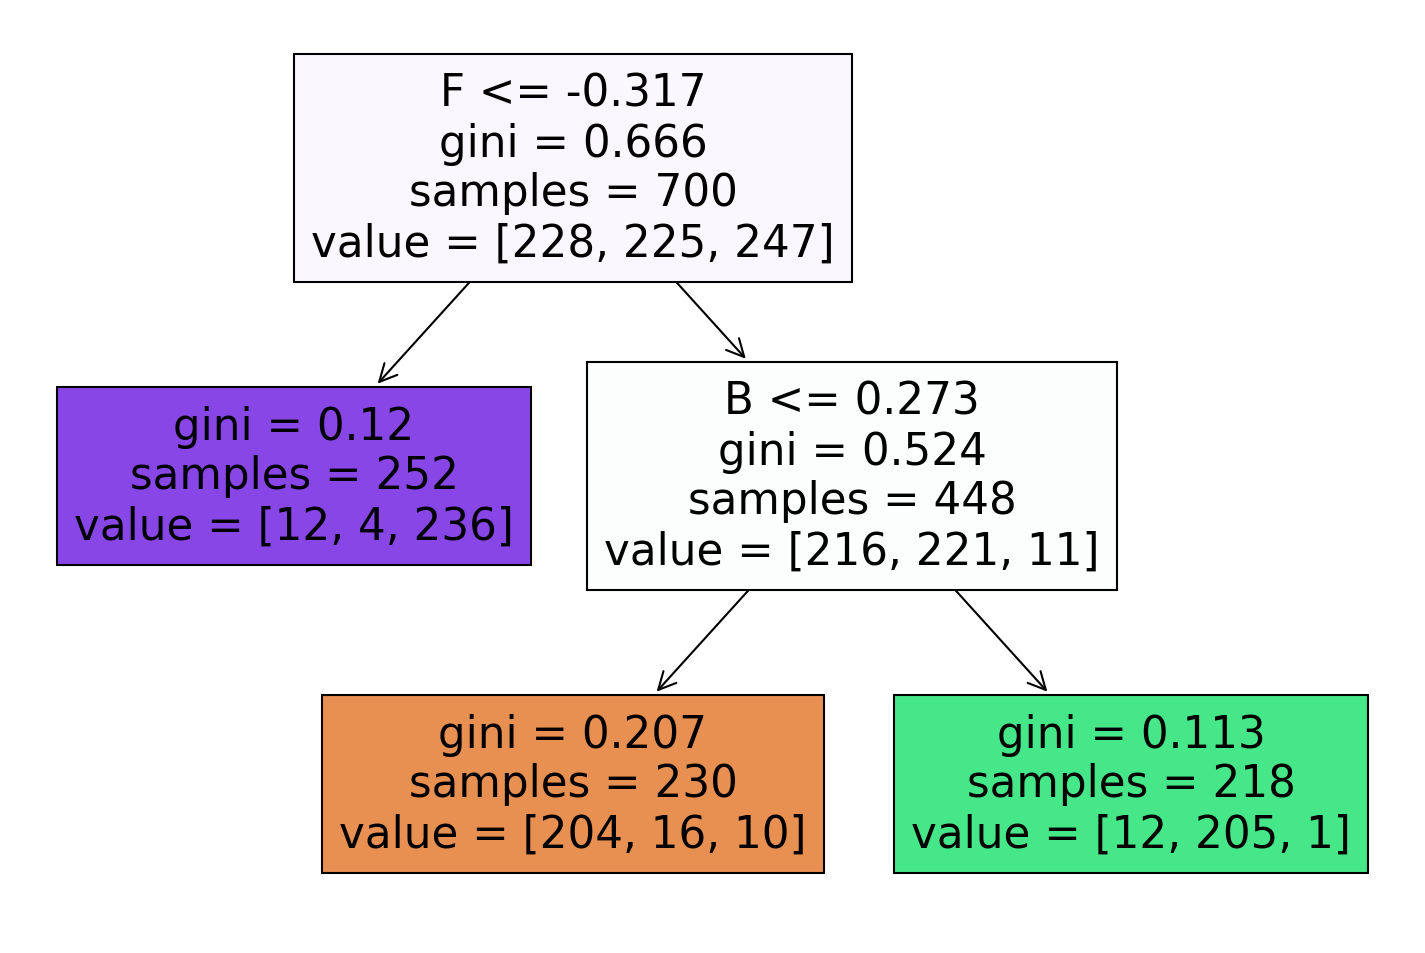

In [52]:
report_model(pruned_tree)

## Criterion

In [53]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.96      0.95      0.96       107
           2       1.00      0.96      0.98        85

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300





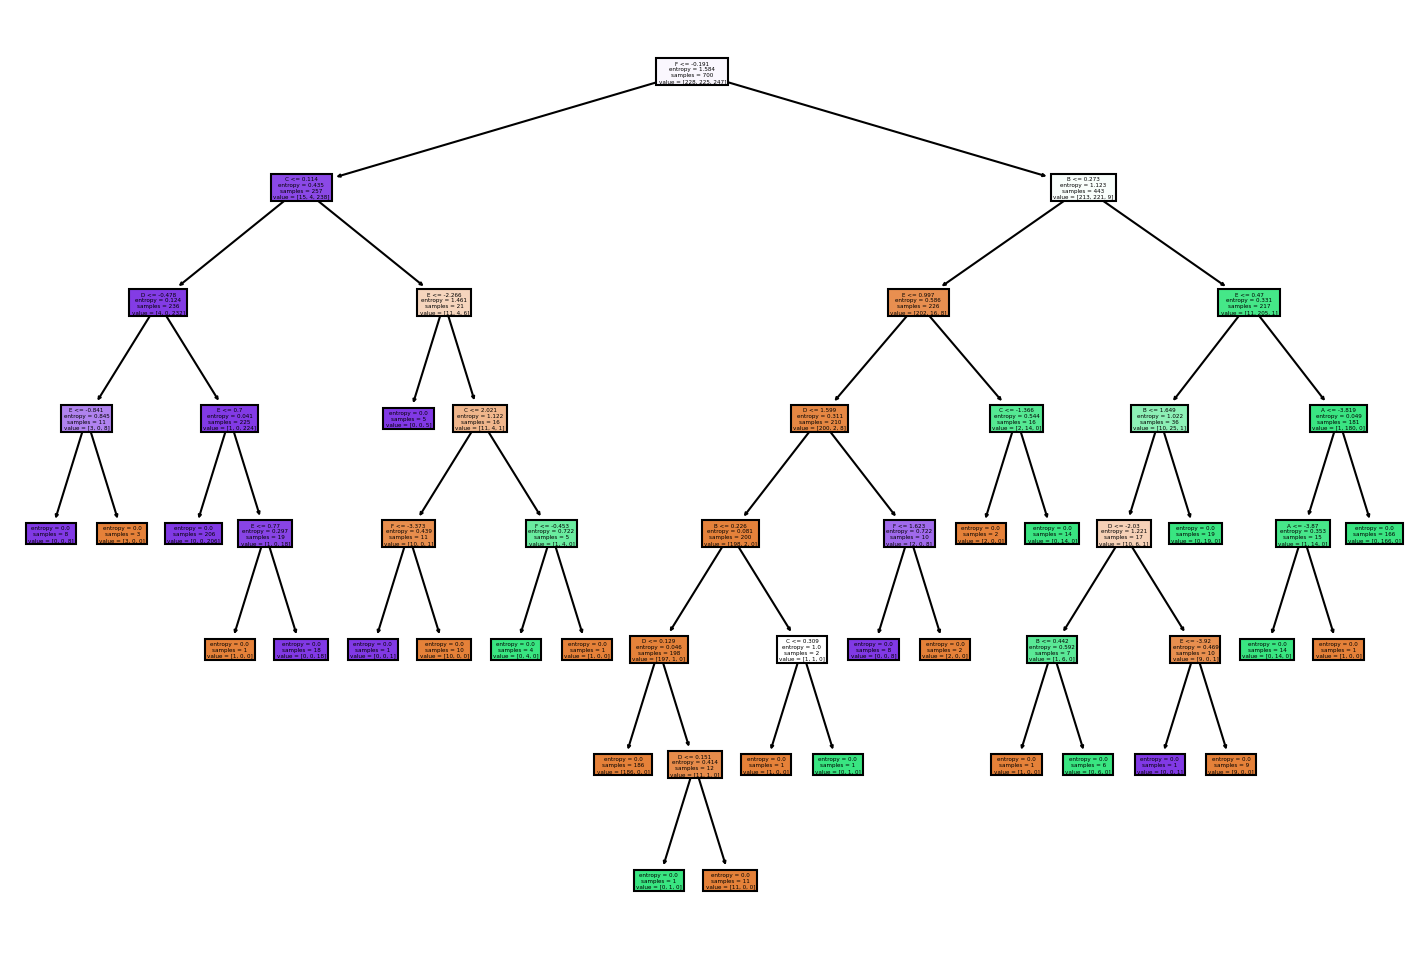

In [54]:
report_model(entropy_tree)

---